In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Import

In [2]:
path = 'dataset/'

low = pd.read_csv(path+'low_v_tan_position.csv')
high = pd.read_csv(path+'high_v_tan_position.csv')

In [3]:
low.head()

,Unnamed: 0,SOURCE_ID,mag_abs,v_tan,l,b,g_rp
0,0,3293764686491591168,9.915977,42.387168,186.179032,-24.301958,1.112200
1,2,3293772490447823232,12.095703,31.409473,186.028342,-24.547609,1.320612
2,3,3293772589231403392,10.454383,7.266938,186.012913,-24.543605,1.190216
3,4,3293773246362078464,8.498131,13.477387,185.918718,-24.663517,1.005732
4,5,3293773830477619840,8.919980,27.725001,185.912979,-24.581077,1.121164


In [4]:
high.head()

,Unnamed: 0,SOURCE_ID,mag_abs,v_tan,l,b,g_rp
0,36,3293818223259506304,9.378773,105.648118,185.929313,-23.796143,1.109787
1,37,3293819215396280192,9.687300,119.167758,185.887620,-23.815332,1.150410
2,43,3293825129566916992,8.788501,156.051084,187.640929,-23.297590,1.083450
3,89,3293864157934057728,8.475696,130.803219,187.697237,-22.638987,1.028452
4,120,3293880066492881024,9.660731,128.149051,187.301746,-22.803261,1.091900


## Distribution

Text(0.5, 1.0, 'M-dwarfs Disk Galactic Latitude Distribution')

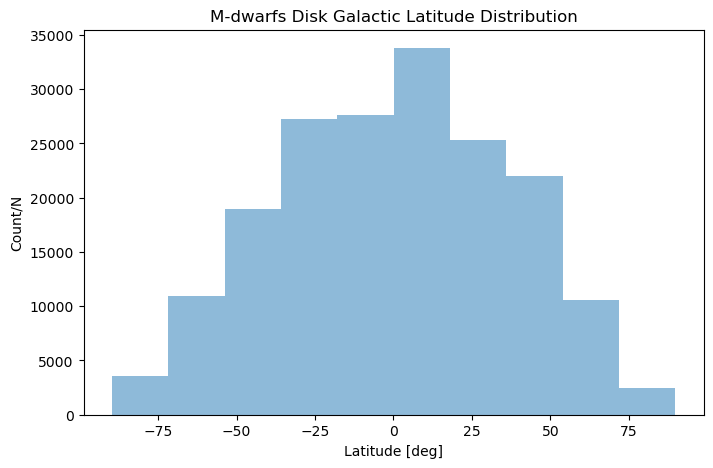

In [107]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.hist(low['b'], alpha=0.5)


plt.xlabel('Latitude [deg]')
plt.ylabel('Count/N')
plt.title('M-dwarfs Disk Galactic Latitude Distribution')